# CS273 Homework 3

## Due: Wednesday Nov 15 2023 (11:59pm)

---
## Instructions


This homework (and subsequent ones) will involve data analysis and reporting on methods and results
using Python code. You will submit a **single PDF file** that contains everything to Gradescope. This includes any text you wish to include to describe your results, the complete code snippets of how you attempted each problem, any figures that were generated, and scans of any work on paper that you wish to include. It is important that you include enough detail that we know how you solved the problem, since otherwise we will be unable to grade it. 

Your homeworks will be given to you as Jupyter notebooks containing the problem descriptions and some template code that will help you get started. You are encouraged to use these starter Jupyter notebooks to complete your assignment and to write your report. This will help you not only ensure that all of the code for the solutions is included, but also will provide an easy way to export your results to a PDF file (for example, doing *print preview* and *printing to pdf*). I recommend liberal use of Markdown cells to create headers for each problem and sub-problem, explaining your implementation/answers, and including any mathematical equations. For parts of the homework you do on paper, scan it in such that it is legible (there are a number of free Android/iOS scanning apps, if you do not have access to a scanner), and include it as an image in the Jupyter notebook.

**Double check that all of your answers are legible on Gradescope, e.g. make sure any text you have written does not get cut off.**

If you have any questions/concerns about using Jupyter notebooks, ask us on EdD. If you decide not to use Jupyter notebooks, but go with Microsoft Word or LaTeX to create your PDF file, make sure that all of the answers can be generated from the code snippets included in the document.
### Summary of Assignment: 100 total points
- Problem 1: A Small Neural Network (25 points)
    - Problem 1.1: Forward Pass (10 points)
    - Problem 1.2: Evaluate Loss (10 points)
    - Problem 1.3: Network Size (5 points)
- Problem 2: Logistic Regression (35 points)
    - Problem 2.1: Initial Training (10 points)
    - Problem 2.2: Regularization (10 points)
    - Problem 2.3: Interpreting the Weights (5 points)
    - Problem 2.4: Learning Curves (10 points)
- Problem 3: Neural Networks in Code (35 points)
    - Problem 2.1: Varying the Amount of Training Data (15 points)
    - Problem 2.3: Optimization Curves (10 points)
    - Problem 2.3: Tuning your Neural Network (10 points)
- Statement of Collaboration (5 points)

Before we get started, let's import some libraries that you will make use of in this assignment. Make sure that you run the code cell below in order to import these libraries.

**Important: In the code block below, we set `seed=1234`. This is to ensure your code has reproducible results and is important for grading. Do not change this. If you are not using the provided Jupyter notebook, make sure to also set the random seed as below.**

**Important: Do not change any codes we give you below, except for those waiting for you to complete. This is to ensure your code has reproducible results and is important for grading.**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml            # common data set access
from sklearn.preprocessing import StandardScaler     # scaling transform
from sklearn.model_selection import train_test_split # validation tools
from sklearn.metrics import accuracy_score, zero_one_loss

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings('ignore')

# Utilities for Problem 3.3
import timeit
import functools
from tqdm.notebook import tqdm
from collections import defaultdict

# Fix the random seed for reproducibility
# !! Important !! : do not change this
seed = 1234
np.random.seed(seed)  

---
## Problem 1: A Small Neural Network


Consider the small neural network given in the image below, which will classify a 3-dimensional feature vector $\mathbf{x}$ into one of three classes ($y = 0, 1, 2$):

You are given an input to this network $\mathbf{x}$, 
$$
\mathbf{x} = \begin{bmatrix} x_1 & x_2 & x_3 \end{bmatrix} = \begin{bmatrix} 1 & 3 & -2 \end{bmatrix}
$$
as well as weights $W$ for the hidden layer and weights $B$ for the output layer. 

$$
W = \begin{bmatrix} 
    w_{01} & w_{11} & w_{21} & w_{31} \\ 
    w_{02} & w_{12} & w_{22} & w_{32} \\
    \end{bmatrix} =
    \begin{bmatrix} 
    1 & -1 & 0 & 5 \\ 
    2 & 1 & 1 & 2 \\
    \end{bmatrix}
$$

$$
B = \begin{bmatrix} 
    \beta_{01} & \beta_{11} & \beta_{21} \\
    \beta_{02} & \beta_{12} & \beta_{22} \\
    \beta_{03} & \beta_{13} & \beta_{23} \\
    \end{bmatrix} =
    \begin{bmatrix}
    4 & -1 & 0 \\
    3 & 0 & 2 \\
    2 & 1 & 1
    \end{bmatrix}
$$

For example, $w_{12}$ is the weight connecting input $x_1$ to hidden node $h_2$; $w_{01}$ is the constant (bias) term for $h_1$, etc.

This network uses the ReLU activation function for the hidden layer, and uses the softmax activation function for the output layer. 

Answer the following questions about this network.

### Problem 1.1 (10 points): Forward Pass
- Given the inputs and weights above, compute the values of the hidden units $h_1, h_2$ and the outputs $f_0, f_1, f_2$. You should do this by hand, i.e. you should not write any code to do the calculation, but feel free to use a calculator to help you do the computations.
- You can optionally use $\LaTeX$ in your answer on the Jupyter notebook. Otherwise, write your answer on paper and include a picture of your answer in this notebook. In order to include an image in Jupyter notebook, save the image in the same directory as the .ipynb file and then write `![caption](image.png)`. Alternatively, you may go to Edit --> Insert Image at the top menu to insert an image into a Markdown cell. **Double check that your image is visible in your PDF submission.**
- What class would the network predict for the input $\mathbf{x}$?

Computing the hidden layer

$$
    h_1 = [w_{01} \cdot x_0] + [w_{11} \cdot x_1] + [w_{21} \cdot x_2] + [w_{31} \cdot x_3] \\
        = [1 \cdot 1] + [(-1) \cdot 1] + [0 \cdot 3] + [5 \cdot -2] \\
        = 1 + (-1) + 0 + (-10) \\
        = -10
$$

$$
    h_2 = [w_{02} \cdot x_0] + [w_{12} \cdot x_1] + [w_{22} \cdot x_2] + [w_{32} \cdot x_3] \\
        = [2 \cdot 1] + [1 \cdot 1] + [1 \cdot 3] + [2 \cdot -2] \\
        = 2 + 1 + 3 + (-4) \\
        = 2
$$

Computing activation function for hidden layer nodes

$$
    h_1 = max(0, h_1) = max(0, -10) = 0
$$

$$
    h_2 = max(0, h_2) = max(0, 2) = 2
$$


Computing the output layer

$$
    f_1 = [\beta_{01} \cdot h_0] + [\beta_{11} \cdot h_1] + [\beta_{21} \cdot h_2]  \\
        = [4 \cdot 1] + [-1 \cdot 0] + [0 \cdot 2]  \\
        = 4 + 0 + 0 \\
        = 4
$$

$$
    f_2 = [\beta_{02} \cdot h_0] + [\beta_{12} \cdot h_1] + [\beta_{22} \cdot h_2]  \\
        = [3 \cdot 1] + [0 \cdot 0] + [2 \cdot 2]   \\
        = 3 + 0 + 4 \\
        = 7
$$

$$
    f_3 = [\beta_{03} \cdot h_0] + [\beta_{13} \cdot h_1] + [\beta_{23} \cdot h_2]  \\
        = [2 \cdot 1] + [1 \cdot 0] + [1 \cdot 2]   \\
        = 2 + 0 + 2 \\
        = 4
$$

Computing activation function for output layer nodes

$$
    f_1 = \frac{e^{f_1}}{\sum_{j=1}^{3} e^{f_j}} = \frac{e^4}{e^4 + e^7 + e^4} = \frac{54.5981}{1205.8294} = 0.0453
$$

$$
    f_2 = \frac{e^{f_2}}{\sum_{j=1}^{3} e^{f_j}} = \frac{e^7}{e^4 + e^7 + e^4} = \frac{1096.6332}{1205.8294} = 0.9094
$$

$$
    f_3 = \frac{e^{f_3}}{\sum_{j=1}^{3} e^{f_j}} = \frac{e^4}{e^4 + e^7 + e^4} = \frac{54.5981}{1205.8294} = 0.0453
$$

Therefore, these are the final values:

Hidden nodes: `[0, 2]`

Output nodes: `[0.0453, 0.9094, 0.0453]`

What class would the network predict for the input $\mathbf{x}$?

The network would predict class `y = 1`

### Problem 1.2 (10 points): Evaluate Loss
Typically when we train neural networks for classification, we seek to minimize the log-loss function. Note that the output of the log-loss function is always nonnegative ($\geq 0$), but can be arbitrarily large (you should pause for a second and make sure you understand why this is true).

- Suppose the true label for the input $\mathbf{x}$ is $y = 1$. What would be the value of our loss function based on the network's prediction for $\mathbf{x}$?
- Suppose instead that the true label for the input $\mathbf{x}$ is $y = 2$. What would be the value of our loss function based on the network's prediction for $\mathbf{x}$?

You are free to use numpy / Python to help you calculate this, but don't use any neural network libraries that will automatically calculate the loss for you.

In [2]:
def semi_log(x):
    e_x = np.exp(x)
    return e_x / np.sum(e_x)

prob_12_act_out = semi_log(np.array([4, 7, 4]))

In [3]:
prob_12a_exp_out = [0, 1, 0]
print('Negative log loss for y = 1: ', -np.sum(prob_12a_exp_out * np.log(prob_12_act_out)))

Negative log loss for y = 1:  0.09492295642096098


In [4]:
prob_12b_exp_out = [0, 0, 1]
print('Negative log loss for y = 2: ', -np.sum(prob_12b_exp_out * np.log(prob_12_act_out)))

Negative log loss for y = 2:  3.094922956420961


### Problem 1.3 (5 points): Network Size
- Suppose we change our network so that there are $12$ hidden nodes instead of $2$. How many total parameters (weights and biases) are in our new network?

Total number of parameters (weights and biases): `87` (`48` hidden, `39` output)

Hidden weight matrix will be of the dimension: `(12, 4)`. That is, `36` weight parameters and `12` bias parameters

Output weight matrix will be of the dimension: `(3, 13)`. That is, `36` weight parameters and `3` bias parameters

<div>
    <img src="data:image/svg+xml,%3C%3Fxml%20version%3D%221.0%22%20encoding%3D%22UTF-8%22%20standalone%3D%22no%22%3F%3E%0A%3C%21DOCTYPE%20svg%20PUBLIC%20%22-//W3C//DTD%20SVG%201.1//EN%22%20%22http%3A//www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd%22%3E%0A%3Csvg%20stroke-miterlimit%3D%2210%22%20style%3D%22fill-rule%3Anonzero%3Bclip-rule%3Aevenodd%3Bstroke-linecap%3Around%3Bstroke-linejoin%3Around%3B%22%20version%3D%221.1%22%20viewBox%3D%220%200%20288%2072%22%20xml%3Aspace%3D%22preserve%22%20xmlns%3D%22http%3A//www.w3.org/2000/svg%22%20xmlns%3Axlink%3D%22http%3A//www.w3.org/1999/xlink%22%3E%0A%3Cdefs/%3E%0A%3Cg%20id%3D%22Layer-1%22%3E%0A%3Cpath%20d%3D%22M34.042%2035.8741C45.8469%2023.244%2031.1794%2022.6473%2024.2857%2024.1167C17.3921%2025.5861-0.960215%2033.2987%206.07817%2043.4256C13.1166%2053.5525%2023.0237%2056.9377%2052.2446%2053.4091C81.4656%2049.8804%2097.2436%2032.811%20122.962%2029.3111C148.681%2025.8112%20155.118%2039.4093%20155.118%2039.4093%22%20fill%3D%22none%22%20opacity%3D%221%22%20stroke%3D%22%23000000%22%20stroke-linecap%3D%22butt%22%20stroke-linejoin%3D%22round%22%20stroke-width%3D%223%22/%3E%0A%3Cpath%20d%3D%22M254.053%2040.6889C242.328%2053.1071%20256.999%2053.6247%20263.883%2052.1549C270.768%2050.685%20289.071%2043.0512%20281.969%2033.1691C274.868%2023.287%20264.94%2020.0179%20235.741%2023.6051C206.543%2027.1922%20190.872%2043.9744%20165.176%2047.5176C139.48%2051.0607%20132.957%2037.7776%20132.957%2037.7776%22%20fill%3D%22none%22%20opacity%3D%221%22%20stroke%3D%22%23000000%22%20stroke-linecap%3D%22butt%22%20stroke-linejoin%3D%22round%22%20stroke-width%3D%223%22/%3E%0A%3C/g%3E%0A%3C/svg%3E%0A" width="200"/>
</div>

In problems 2 & 3, we will explore classifying the MNIST dataset using a logistic classifier, and then a two-layer neural network.

## Problem 2: Logistic Regression

In this problem, you will be building a linear classifier (specifically, a logistic regression model) on the MNIST data set (which we also saw in Homework 1). As a reminder, this is an image classification dataset, where each image is a hand-written digit. Take a look at Homework 1 to remind yourself what this dataset looks like.

### Problem 2.0: Setting up the Data
First, we'll load our dataset and split it into a training set and a testing set. Here you are given code that does this for you, and you only need to run it.

We will use the scikit-learn class `StandardScaler` to standardize both the training and testing features. Notice that we **only** fit the `StandardScaler` on the training data, and *not* the testing data.

In [5]:
# Load the features and labels for the MNIST dataset
# This might take a minute to download the images.
X, y = fetch_openml('mnist_784', as_frame=False, return_X_y=True)

# Convert labels to integer data type
y = y.astype(int)

In [6]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.1, random_state=seed, shuffle=True)

scaler = StandardScaler()
scaler.fit(X_tr)
X_tr = scaler.transform(X_tr)     # We can forget about the original values & work
X_te = scaler.transform(X_te)     #  just with the transformed values from here

### Problem 2.1: Initial Training (10 points)
For this part of the problem, you will train on **just** the first 10000 training data points, and compute the training and test error rates.  
- Be sure to set the random seed with ``random_state=seed`` for consistency.
- Other than the random seed, just use the default values of the learner for this part.
- Here, the training error rate is defined on the first 10k data points (i.e., the points that were used for training the model
- The test error rate is defined on the full test data from your split.

In [7]:
m_tr = 10000

X_tr_subset = X_tr[:m_tr, :]
y_tr_subset = y_tr[:m_tr]

### YOUR CODE STARTS HERE ###

# Construct a logistic regression classifier (random_state = seed)
logreg = LogisticRegression(random_state = seed)

# Fit the model to the training data subset
logreg.fit(X_tr_subset, y_tr_subset)

# Compute the training error (on the subset) and testing error (on the test data)
y_tr_subset_pred = logreg.predict(X_tr_subset)
tr_subset_err = 1 - accuracy_score(y_tr_subset, y_tr_subset_pred)

y_te_pred = logreg.predict(X_te)
tr_err = 1 - accuracy_score(y_te, y_te_pred)

print(f'Training subset data error: {tr_subset_err}')
print(f'Test data error: {tr_err}')
### YOUR CODE ENDS HERE ###

Training subset data error: 0.0013999999999999568
Test data error: 0.12042857142857144


### Problem 2.2: Regularization (10 points)

Suspecting that we are overfitting to our limited data set, we decide to try to use regularization.  (This should reduce our model's variance, and thus its tendency to overfit.)  Try re-training your logistic regression model at various levels of regularization.  

The ``LogisticRegression`` class in ``sklearn`` takes an "inverse regularization" parameter, ``C`` (effectively the same as the value $R$ we saw in soft-margin Support Vector Machines).  Re-train your model with values of $C \in \{.0001, .001, .01, .1, 1.0, 10.\}$ and compute the training and test error rates of each setting.  Plot the training and test error rates together as a function of $C$ (use ``semilogx``) and state what value of $C$ you would select and why.

In [8]:
m_tr = 10000
C_vals = [.0001,.001,.01,.1,1.,10.]

### YOUR CODE STARTS HERE ###
c_val_tr_err = [0] * len(C_vals)
c_val_te_err = [0] * len(C_vals)
logreg = [None] * len(C_vals)

In [9]:
# Train a logistic regression model with each inverse regularization C
def train_regressor(idx, C):
    logreg[idx] = LogisticRegression(random_state=seed, C = C)
    logreg[idx].fit(X_tr_subset, y_tr_subset)

for idx, C in enumerate(tqdm(C_vals)):
    print(f'C: {C}', end=' ')
    timer = timeit.Timer(functools.partial(train_regressor, idx, C))
    print(f'| Elapsed: {timer.timeit(1)}')

  0%|          | 0/6 [00:00<?, ?it/s]

C: 0.0001 | Elapsed: 0.9982594160246663
C: 0.001 | Elapsed: 1.8262467500171624
C: 0.01 | Elapsed: 2.77672366698971
C: 0.1 | Elapsed: 2.703161582991015
C: 1.0 | Elapsed: 2.692650374956429
C: 10.0 | Elapsed: 2.919363458000589


In [10]:
for idx, tr_sz in enumerate(C_vals):    
    # Compute the training and test error rates
    y_tr_subset_pred = logreg[idx].predict(X_tr_subset)
    c_val_tr_err[idx] = 1 - accuracy_score(y_tr_subset, y_tr_subset_pred)

    y_te_pred = logreg[idx].predict(X_te)
    c_val_te_err[idx] = 1 - accuracy_score(y_te, y_te_pred)

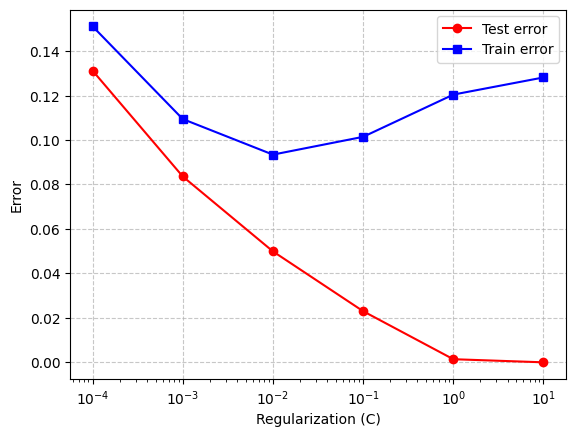

In [11]:
# Plot the resulting performance as a function of C
plt.semilogx(C_vals, c_val_tr_err, c='r', marker='o', label='Test error')
plt.semilogx(C_vals, c_val_te_err, c='b', marker='s', label='Train error')
plt.xticks(C_vals)
plt.ylabel('Error')
plt.xlabel('Regularization (C)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend();

In [12]:
for C, train, test in zip(C_vals, c_val_tr_err, c_val_te_err):
    print(f"C: {C}  Train Error: {train}  Test Error: {test}")
### YOUR CODE ENDS HERE ###

C: 0.0001  Train Error: 0.13119999999999998  Test Error: 0.15114285714285713
C: 0.001  Train Error: 0.08360000000000001  Test Error: 0.10942857142857143
C: 0.01  Train Error: 0.049900000000000055  Test Error: 0.09342857142857142
C: 0.1  Train Error: 0.02300000000000002  Test Error: 0.10142857142857142
C: 1.0  Train Error: 0.0013999999999999568  Test Error: 0.12042857142857144
C: 10.0  Train Error: 0.0  Test Error: 0.12814285714285711


#### What value of C would you choose?

Based on the error graph, it can be seen that the test error is lowest for C = `0.01` along with relatively low train error.
Hence I would choose `0.01` as the regularization value (C)

### Problem 2.3: Interpreting the weights (5 points)
Now that we have a model that we believe might perform well, let's try to understand what propertes of the data it is using to make its predictions.  Since our model is just using a linear combination of the input pixels, we can display the coefficient (slope) associated with each pixel, to see whether that pixel's being bright (high value) is positively associated with a given class, or is negatively associated with that class.

First, re-train your model using your selected value of $C$.

In [13]:
### YOUR CODE START HERE ###

# Re-train your model with your selected value of C 
C_selected = 0.01

logreg = LogisticRegression(C = C_selected)
logreg.fit(X_tr, y_tr);
### YOUR CODE ENDS HERE ###

Run the provided code to display the coefficients of the first four classes' linear responses, re-shaped to the same size as the input image.  (Here, red is positive, blue is negative, and white is zero.)  Do the responses make sense?  Discuss.

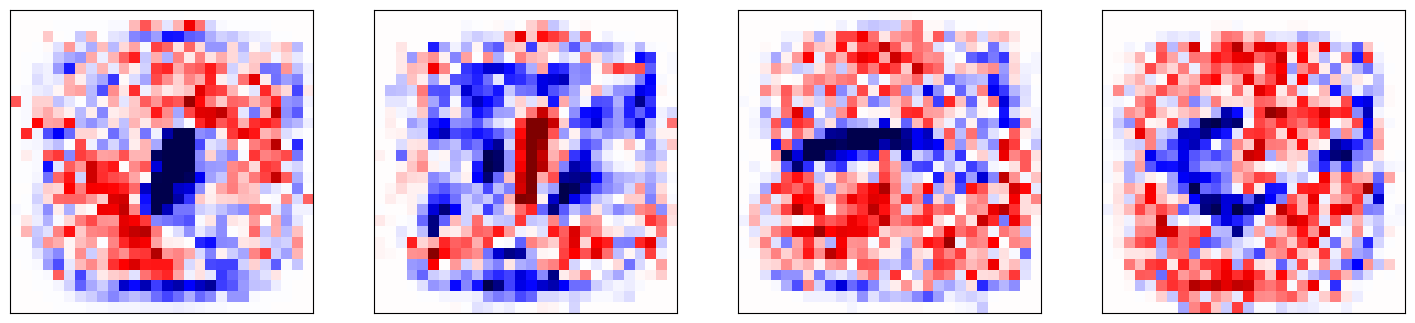

In [14]:
fig, ax = plt.subplots(1,4, figsize=(18,6))

mu = logreg.coef_.mean(0).reshape(28,28)    
for i in range(4):
    ax[i].imshow(logreg.coef_[i,:].reshape(28,28)-mu,cmap='seismic',vmin=-.2,vmax=.2); 
    ax[i].set_xticks([]); ax[i].set_yticks([])

In each graph, positive values correctly pinpoint the regions where the number associated with that label is expected, while negative values indicate areas where the number is unlikely to be present. For instance, in the first graph, positive values form a near-circle or shape resembling '0,' and in the center of the graph, the blue regions signify that the model predicts the center to be empty. Similarly, in the last graph, the presence of '3' is prominently highlighted in red, with blue indicating regions not associated with '3.' The intensity of the color reflects the model's confidence in identifying these regions as either positive or negative. Each coefficient effectively captures features aligned with the label it represents. The overall color patterns make sense, showcasing that the model has successfully learned and recognized relevant features from the input images for accurate classification.

### Problem 2.4: Learning Curves (10 points)
Another way to reduce overfitting is to increase the amount of data used for training the model (if possible).  Build a logistic regression model, but with no regularization

- Train a logistic regression classifier (with the default settings in sklearn) using the first `m_tr` feature vectors in `X_tr`, where `m_tr = [100, 1000, 5000, 10000, 20000, 50000, 63000]` .You should use the `LogisticRegression` class from scikit-learn in your implementation. **Make sure to use the argument `random_state=seed` for reproducibility.**
- Create a plot of the training error and testing error for your logistic regression model as a function of the number of training data points. Be sure to include an x-label, y-label, and legend in your plot. Use a log-scale on the x-axis. Give a short (one or two sentences) description of what you see in your plot.
- Add a comment with your thoughts after the plot: although we ran out of data at 63k examples, can you tell how much additional data could help, with this model?

(Note: be sure to save these values, as we will want to plot them again in a later part of the homework.)

In [16]:
train_sizes = [100, 1000, 5000, 10000, 20000, 50000, 63000]

C = np.inf      # No regularization!

### YOUR CODE STARTS HERE ###
c_val_tr_err_m_inf = [0] * len(train_sizes)
c_val_te_err_m_inf = [0] * len(train_sizes)

In [17]:
# Train a logistic regression model with each data size m and C=infinity
logreg = [None] * len(train_sizes)
def train_regressor(idx, tr_sz):
    logreg[idx] = LogisticRegression(random_state=seed, C = C)
    logreg[idx].fit(X_tr[:tr_sz, :], y_tr[:tr_sz])

for idx, tr_sz in enumerate(tqdm(train_sizes)):
    print(f'Training size: {tr_sz}', end=' ')
    timer = timeit.Timer(functools.partial(train_regressor, idx, tr_sz))
    print(f'| Elapsed: {timer.timeit(1)}')

  0%|          | 0/7 [00:00<?, ?it/s]

Training size: 100 | Elapsed: 0.13624433299992234
Training size: 1000 | Elapsed: 0.1116116659832187
Training size: 5000 | Elapsed: 0.5667952909716405
Training size: 10000 | Elapsed: 2.549320792022627
Training size: 20000 | Elapsed: 4.308481791988015
Training size: 50000 | Elapsed: 12.777072416967712
Training size: 63000 | Elapsed: 16.276647041959222


In [18]:
for idx, tr_sz in enumerate(train_sizes):
    X_tr_subset_c_inf = X_tr[:tr_sz, :]
    y_tr_subset_c_inf = y_tr[:tr_sz]

    # Compute the training and test error rates
    y_tr_subset_pred = logreg[idx].predict(X_tr_subset_c_inf)
    c_val_tr_err_m_inf[idx] = 1 - accuracy_score(y_tr_subset_c_inf, y_tr_subset_pred)

    y_te_pred = logreg[idx].predict(X_te)
    c_val_te_err_m_inf[idx] = 1 - accuracy_score(y_te, y_te_pred)

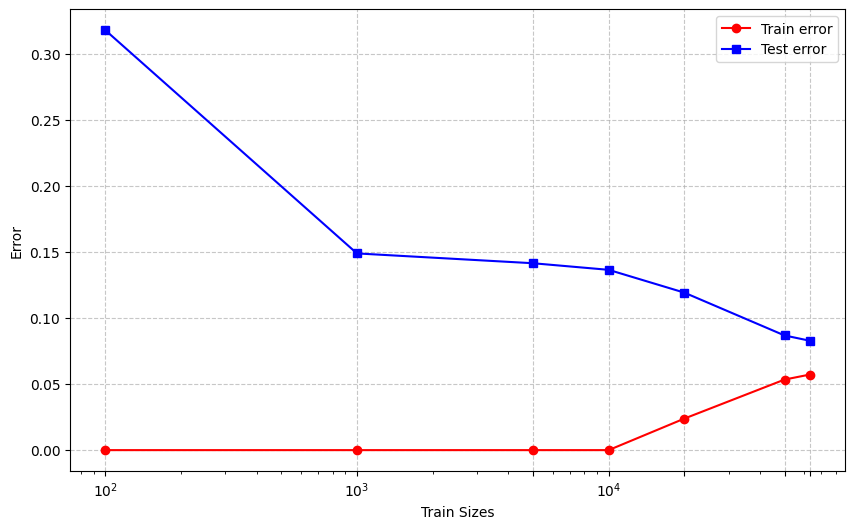

In [19]:
# Plot the resulting performance as a function of m
plt.figure(figsize=(10, 6))
plt.semilogx(train_sizes, c_val_tr_err_m_inf, c='r', marker='o', label='Train error')
plt.semilogx(train_sizes, c_val_te_err_m_inf, c='b', marker='s', label='Test error')
plt.xticks(train_sizes)
plt.ylabel('Error')
plt.xlabel('Train Sizes')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend();
### YOUR CODE ENDS HERE ###

In [41]:
train_sizes, c_val_te_err_m_inf

([100, 1000, 5000, 10000, 20000, 50000, 63000],
 [0.31814285714285717,
  0.14900000000000002,
  0.14157142857142857,
  0.13657142857142857,
  0.11928571428571433,
  0.08685714285714285,
  0.08285714285714285])

__Observations from the graph__

With `100` data sameples, the test error is significant at around `35%`. But with `1000` data samples, the error quickly drops to below `15%` and the next big improvement comes at `50,000` samples when error rates reduces by 4% (from 12% to 8%).

__Can you tell how much additional data could help, with this model?__

According to the graph, further adjustments are unlikely to yield substantial enhancements to the model. The current performance, achieved with 63,000 data samples, has plateaued near the minimum error, and any potential improvement is expected to be marginal. Moreover, achieving such gains might necessitate a substantial increase in the volume of data.

<div>
    <img src="data:image/svg+xml,%3C%3Fxml%20version%3D%221.0%22%20encoding%3D%22UTF-8%22%20standalone%3D%22no%22%3F%3E%0A%3C%21DOCTYPE%20svg%20PUBLIC%20%22-//W3C//DTD%20SVG%201.1//EN%22%20%22http%3A//www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd%22%3E%0A%3Csvg%20stroke-miterlimit%3D%2210%22%20style%3D%22fill-rule%3Anonzero%3Bclip-rule%3Aevenodd%3Bstroke-linecap%3Around%3Bstroke-linejoin%3Around%3B%22%20version%3D%221.1%22%20viewBox%3D%220%200%20288%2072%22%20xml%3Aspace%3D%22preserve%22%20xmlns%3D%22http%3A//www.w3.org/2000/svg%22%20xmlns%3Axlink%3D%22http%3A//www.w3.org/1999/xlink%22%3E%0A%3Cdefs/%3E%0A%3Cg%20id%3D%22Layer-1%22%3E%0A%3Cpath%20d%3D%22M34.042%2035.8741C45.8469%2023.244%2031.1794%2022.6473%2024.2857%2024.1167C17.3921%2025.5861-0.960215%2033.2987%206.07817%2043.4256C13.1166%2053.5525%2023.0237%2056.9377%2052.2446%2053.4091C81.4656%2049.8804%2097.2436%2032.811%20122.962%2029.3111C148.681%2025.8112%20155.118%2039.4093%20155.118%2039.4093%22%20fill%3D%22none%22%20opacity%3D%221%22%20stroke%3D%22%23000000%22%20stroke-linecap%3D%22butt%22%20stroke-linejoin%3D%22round%22%20stroke-width%3D%223%22/%3E%0A%3Cpath%20d%3D%22M254.053%2040.6889C242.328%2053.1071%20256.999%2053.6247%20263.883%2052.1549C270.768%2050.685%20289.071%2043.0512%20281.969%2033.1691C274.868%2023.287%20264.94%2020.0179%20235.741%2023.6051C206.543%2027.1922%20190.872%2043.9744%20165.176%2047.5176C139.48%2051.0607%20132.957%2037.7776%20132.957%2037.7776%22%20fill%3D%22none%22%20opacity%3D%221%22%20stroke%3D%22%23000000%22%20stroke-linecap%3D%22butt%22%20stroke-linejoin%3D%22round%22%20stroke-width%3D%223%22/%3E%0A%3C/g%3E%0A%3C/svg%3E%0A" width="200"/>
</div>

---
## Problem 3: Neural Networks in Code

In this part of the assignment, you will get some hands-on experience working with neural networks. We will be using the scikit-learn implementation of a multi-layer perceptron (MLP). See [here](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) for the corresponding documentation. Although there are specialized Python libraries for neural networks, like [TensorFlow](https://www.tensorflow.org/) and [PyTorch](https://pytorch.org/), we'll stick with scikit-learn since you're already familiar with this library.

We will be working with the same MNIST data as in Problem 2, and comparing our neural network's performance to that of logistic regression.

### Problem 3.1: Varying the amount of training data (15 points)
One reason that neural networks have become popular in recent years is that, for many problems, we now have access to very large datasets. Since neural networks are very flexible models, they are often able to take advantage of these large datasets in order to achieve high levels of accuracy. In this problem, you will vary the amount of training data available to a neural network and see what effect this has on the model's performance.

In this problem, you should use the following settings for your network:
- A single hidden layer with $64$ hidden nodes
- Use the ReLU activation function
- Train the network using stochastic gradient descent (SGD) and a constant learning rate of $0.001$
- Use a batch size of 256
- **Make sure to set `random_state=seed`.**

Your task is to implement the following:
- Train an MLP model (with the above hyperparameter settings) using the first `m_tr` feature vectors in `X_tr`, where `m_tr = [100, 1000, 5000, 10000, 20000, 50000, 63000]`. You should use the `MLPClassifier` class from scikit-learn in your implementation.
- Create a plot of the training error and testing error for your MLP model as a function of the number of training data points.  For comparison, also plot the training and test error rates you found for logistic regression in Problem 2. Again, be sure to include an x-label, y-label, and legend in your plot and use a log-scale on the x-axis.
- Give a short (one or two sentences) description of what you see in your plot.   Do you think that more data (beyond these 63000 examples) would continue to improve the model's performance?

**Note** that training a neural network with a lot of data can be **a slow process**. Hence, you should be careful to implement your code such that it runs in a reasonable amount of time. One recommendation is to test your code using only a small subset of the given `m_tr` values, and only run your code with the larger values of `m_tr` once you are certain your code is working. (For reference, it took about 20 minutes to train all models on a quad-core desktop with no GPU.)

In [20]:
train_sizes = [100, 1000, 5000, 10000, 20000, 50000, 63000]

### YOUR CODE STARTS HERE ###
mlp_classifier = [None] * len(train_sizes)
tr_err_nn_mlp = [0] * len(train_sizes)
te_err_nn_mlp = [0] * len(train_sizes)

### CONSTANTS
hidden_layer_size = (64, )
batch_size = 256
learning_rate = 'constant'
learning_rate_init = 0.001

In [21]:
# Train your neural network model with each data size m and given hyperparameter values
def train_mlp(idx, tr_sz):
    mlp_classifier[idx] = MLPClassifier(solver='sgd',
                                        activation='relu', 
                                        random_state=seed,
                                        batch_size=batch_size,
                                        learning_rate=learning_rate,
                                        hidden_layer_sizes=hidden_layer_size,
                                        learning_rate_init=learning_rate_init)
    mlp_classifier[idx].fit(X_tr[:tr_sz, :], y_tr[:tr_sz])
    
for idx, tr_sz in enumerate(tqdm(train_sizes)):
    print(f'Training size {tr_sz}', end=' ')
    timer = timeit.Timer(functools.partial(train_mlp, idx, tr_sz))
    print(f'| Elapsed: {timer.timeit(1)}')

  0%|          | 0/7 [00:00<?, ?it/s]

Training size 100 | Elapsed: 0.4410994580248371
Training size 1000 | Elapsed: 2.9823125419788994
Training size 5000 | Elapsed: 14.26896170899272
Training size 10000 | Elapsed: 29.741307832999155
Training size 20000 | Elapsed: 56.784442249976564
Training size 50000 | Elapsed: 142.80027770902961
Training size 63000 | Elapsed: 188.67018387495773


In [22]:
# Compute the training and test error rates
for idx, tr_sz in enumerate(train_sizes):
    X_tr_subset_nn_mlp = X_tr[:tr_sz, :]
    y_tr_subset_nn_mlp = y_tr[:tr_sz]

    # Compute the training and test error rates
    y_tr_subset_nn_mlp_pred = mlp_classifier[idx].predict(X_tr_subset_nn_mlp)
    tr_err_nn_mlp[idx] = 1 - accuracy_score(y_tr_subset_nn_mlp, y_tr_subset_nn_mlp_pred)

    y_te_nn_mlp_pred = mlp_classifier[idx].predict(X_te)
    te_err_nn_mlp[idx] = 1 - accuracy_score(y_te, y_te_nn_mlp_pred)

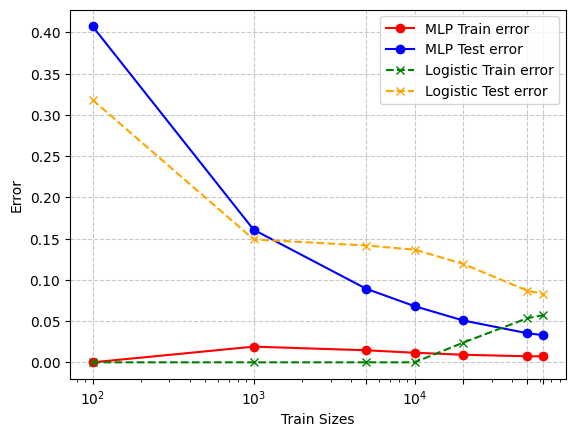

In [23]:
# Plot the resulting performance as a function of m
plt.semilogx(train_sizes, tr_err_nn_mlp, c='r', linestyle='-', marker='o', label='MLP Train error')
plt.semilogx(train_sizes, te_err_nn_mlp, c='b', linestyle='-', marker='o', label='MLP Test error')
plt.semilogx(train_sizes, c_val_tr_err_m_inf, c='g', linestyle='--', marker='x', label='Logistic Train error')
plt.semilogx(train_sizes, c_val_te_err_m_inf, c='orange', linestyle='--', marker='x', label='Logistic Test error')
plt.xticks(train_sizes)
plt.ylabel('Error')
plt.xlabel('Train Sizes')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend();
### YOUR CODE ENDS HERE ###

##### Give a short (one or two sentences) description of what you see in your plot. Do you think that more data (beyond these 63000 examples) would continue to improve the model's performance?

__Observations from the graph__
As previously mentioned in the regression model analysis, the test error, with only 100 data samples, is nearly 40%, whereas the train error is 0, indicating overfitting to the training data. Similar to the regression model, the test error significantly decreases with additional training data. Interestingly, the MLP classifier achieves less than 5% error, surpassing the performance of the regression model with the same training data size. This suggests that the MLP classifier is a more effective model for this task.

The observable trend in the graph indicates a reduction in test error as the training size increases, suggesting a potential for improved model performance with more data samples. However, there might be diminishing returns on performance gains with increases in the training dataset size.

---
### Problem 3.2: Optimization Curves (10 points)

One hyperparameter that can have a significant effect on the optimization of your model, and thus its performance, is the learning rate, which controls the step size in (stochastic) gradient descent. In this problem you will vary the learning rate to see what effect this has on how quickly training converges as well as the effect on the performance of your model.

In this problem, you should use the following settings for your network:
- A single hidden layer with $64$ hidden nodes
- Use the ReLU activation function
- Train the network using stochastic gradient descent (SGD)
- Use a batch size of 256
- Set `n_iter_no_change=100` and `max_iter=100`. This ensures that all of your networks in this problem will train for 100 epochs (an *epoch* is one full pass over the training data).
- Make sure to set `random_state=seed`.

Your task is to:
- Train a neural network with the above settings, but vary the learning rate in `lr = [0.0005, 0.001, 0.005, 0.01]`.
- Create a plot showing the training loss as a function of the training epoch (i.e. the x-axis corresponds to training iterations) for each learning rate above. You should have a single plot with four curves. Make sure to include an x-label, a y-label, and a legend in your plot. (Hint: `MLPClassifier` has an attribute `loss_curve_` that you likely find useful.)
- Include a short description of what you see in your plot.

**Important: To make your code run faster, you should train all of your networks in this problem on only the first 10,000 images of `X_tr`**. In the following cell, you are provided a few lines of code that will create a small training set (with the first 10,000 images in `X_tr`) and a validation set (with the second 10,000 images in `X_tr`). You will use the validation later in Problem 3.3. 

In [24]:
# Create a smaller training set with the first 10,000 images in X_tr
#   along with a validation set from images 10,000 - 20,000 in X_tr

X_val = X_tr[10000:20000] # Validation set
y_val = y_tr[10000:20000]

X_tr = X_tr[:10000]       # From here on, we will only use these smaller sets,
y_tr = y_tr[:10000]       #  so it's OK to discard the rest of the data

In [25]:
learning_rates = [0.0005, 0.001, 0.005, 0.01]

### YOUR CODE STARTS HERE ###
mlp_classifier_lr: list[MLPClassifier] = [None] * len(learning_rates)
tr_err_nn_mlp_lr = [0] * len(learning_rates)
te_err_nn_mlp_lr = [0] * len(learning_rates)

### CONSTANTS
hidden_layer_size = (64, )
batch_size = 256
learning_rate = 'constant'
learning_rate_init = 0.001

In [26]:
def train_mlp(idx, learning_rate_init):
    mlp_classifier_lr[idx] = MLPClassifier(solver='sgd',
                                        max_iter=100,
                                        activation='relu', 
                                        random_state=seed,
                                        n_iter_no_change=100,
                                        batch_size=batch_size,
                                        learning_rate=learning_rate,
                                        hidden_layer_sizes=hidden_layer_size,
                                        learning_rate_init=learning_rate_init)
    mlp_classifier_lr[idx].fit(X_tr, y_tr)

# Train your neural network model on the small data using each learning rate
for idx, learning_rate_init in enumerate(tqdm(learning_rates)):
    print(f'Learning rate {learning_rate_init}', end=' ')
    timer = timeit.Timer(functools.partial(train_mlp, idx, learning_rate_init))
    print(f'| Elapsed: {timer.timeit(1)}')

  0%|          | 0/4 [00:00<?, ?it/s]

Learning rate 0.0005 | Elapsed: 15.039055916015059
Learning rate 0.001 | Elapsed: 14.553039958002046
Learning rate 0.005 | Elapsed: 14.466594750003424
Learning rate 0.01 | Elapsed: 14.536807666008826


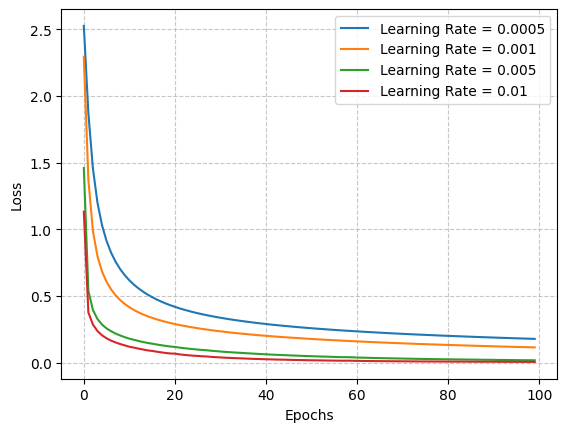

In [45]:
# Plot the training loss curve for each setting (single plot) & compare
for idx, learning_rate_init in enumerate(learning_rates):
    plt.plot(mlp_classifier_lr[idx].loss_curve_, label=f'Learning Rate = {learning_rate_init}')

plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend();
### YOUR CODE ENDS HERE ###

The model exhibits a reduction in loss with each epoch, indicative of convergence. Notably, there is a discernible trend where the loss sharply decreases within the initial `10` epochs. Specifically, the loss diminishes from `2.5` to less than `0.5` in this brief period.

Furthermore, it's noteworthy that a higher learning rate leads to a more rapid reduction in loss. For example, when using a learning rate of `0.0005`, the error dips below `0.5` after approximately `15` epochs, whereas with a learning rate of `0.01`, this threshold is reached within just `5` epochs. However, it's important to observe that there's a point of saturation with an increase in the number of epochs, resulting in negligible improvement in the error.

### Problem 3.3: Tuning a Neural Network (10 points)

As you saw in Problem 3.2, there are many hyperparameters of a neural network that can possibly be tuned in order to try to maximize the accuracy of your model. For the final problem of this assignment, it is your job to tune these hyperparameters.

For example, some hyperparameters you might choose to tune are:
- Learning rate
- Depth/width of the hidden layers
- Regularization strength
- Activation functions
- Batch size in stochastic optimization
- etc.

To do this, you should train a network on the training data `X_tr` and evaluate its performance on the validation set `X_val` -- your goal is to achieve the highest possible accuracy on `X_val` by changing the network hyperparameters. **Important: To make your code run faster, you should train all of your networks in this problem on only the first 10,000 images of `X_tr`**. This was already set up for you in Problem 3.2.

Try to find settings that enable you to achieve an error rate smaller than 5% on the validation data. However, tuning neural networks can be difficult; if you cannot achieve this target error rate, be sure to try at least five different neural networks (corresponding to five different settings of the hyperparameters).

In your answer, include a table listing the different hyperparameters that you tried, along with the resulting accuracy on the training and validation sets `X_tr` and `X_val`. Indicate which of these hyperparameter settings you would choose for your final model, and report the accuracy of this final model on the testing set `X_te`.

The final model achieved a validation accuracy of `96.25%`. The hyperparameters for this model are as follows:
- Batch size: `256`
- Hidden layer size: `(784, 350)`
- Max Iteration: `250`
- n_iter_no_change: `100`
- Solver function: `sgd`
- Activation function: `relu`
- Learning type: `constant`
- Learning rate: `0.1`

In the pursuit of identifying the optimal model configuration with the highest accuracy (lowest error) on the validation data, the following parameters were tuned:
- Solver function (training)
- Maximum iterations
- Activation function
- Batch size
- Learning type
- Learning rate
- Hidden layer size
- Regularization

Presented below are the hyperparameters of the top 5 models, out of 60, ranked by their accuracy:

|   Batch Size | Hidden Layer Size   | Learn Type   |   Learning Rate |   Max Iter |   n_iter_no_change | Solver   | Activation   |   Train Score |   Test Score |
|-------------:|:--------------------|:-------------|----------------:|-----------:|-------------------:|:---------|:-------------|--------------:|-------------:|
|          256 | (784, 350)          | constant     |            0.1  |        250 |                100 | sgd      | relu         |        1      |       0.9628 |
|          256 | (784, 350)          | constant     |            0.1  |        200 |                100 | sgd      | relu         |        1      |       0.9626 |
|          256 | (784, 350)          | constant     |            0.1  |        100 |                100 | sgd      | relu         |        1      |       0.9622 |
|          256 | (784, 350)          | constant     |            0.1  |        100 |                100 | sgd      | relu         |        1      |       0.9622 |
|          256 | (784, 340)          | constant     |            0.1  |        100 |                100 | sgd      | relu         |        1      |       0.9621 |

For detailed information on all models, including the hyperparameter identification process and associated graphs, please refer to the subsequent sections.

#### Hyperparameter Tuning

In the following sections, the process of fine-tuning hyperparameters is elucidated to derive the optimal model configuration.

To initiate this tuning process, an MLPClassifier is instantiated with default hyperparameter values. Subsequently, a single hyperparameter is chosen for adjustment, and various models are crafted by exploring a range of values for this selected hyperparameter. Throughout this exploration, all other hyperparameters within the generated models are held constant. The models are systematically evaluated, and the one demonstrating the highest test accuracy (lowest error) is singled out. Following this, the focus shifts to the next hyperparameter in line for tuning. During each iteration of this tuning process, the previously identified high-accuracy value for the hyperparameter is maintained while generating and evaluating models with the next hyperparameter adjustment. This iterative refinement ensures a meticulous approach to identifying the optimal hyperparameter values for enhanced model performance.

For reference, a comprehensive table detailing all the models, their respective hyperparameters, and associated scores is provided in the last section.

#### Defining Utilities for Hyperparameter Tuning

In [28]:
mlp_classifiers = defaultdict(list)
mlp_classifiers_set = {}

In [29]:
def train_mlp(label, solver='sgd', max_iter=100, activation='relu', batch_size=256, 
              learning_rate='constant', learning_rate_init=0.001, 
              hidden_layer_size=(64, ), n_iter_no_change=100, alpha=0.0001):
    mlp_classifiers[label] += [MLPClassifier(
        solver=solver, max_iter=max_iter, activation=activation, 
        n_iter_no_change=n_iter_no_change, batch_size=batch_size,
        learning_rate=learning_rate, hidden_layer_sizes=hidden_layer_size,
        learning_rate_init=learning_rate_init, alpha=alpha, random_state=seed
    )]
    mlp_classifiers[label][-1].fit(X_tr, y_tr)

def compute_accuracy(classifier):
    return (
        accuracy_score(y_tr, classifier.predict(X_tr)), 
        accuracy_score(y_val, classifier.predict(X_val)), 
    )

def plot_error(label, classifiers, parameter):
    # Compute the training and test error rates
    tr_err = [0] * len(classifiers)
    te_err = [0] * len(classifiers)
    for idx, classifier in enumerate(classifiers):
        tr_err[idx], te_err[idx] = compute_accuracy(classifier)

    parameter_idx_max = np.argmax(te_err)
    
    plt.plot(parameter, np.multiply(tr_err, 100), label='Training Accuracy', marker='o')
    plt.plot(parameter, np.multiply(te_err, 100), label='Test Accuracy', marker='s')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.xlabel(label)
    plt.ylabel('Accuracy')
    print(f'Best parameter: {parameter[parameter_idx_max]} | Accuracy: {te_err[parameter_idx_max] * 100}%')

def time_train_mlp(label, parameter, timed_func: functools.partial):    
    set_label = f'{label}_{parameter}'
    if set_label in mlp_classifiers_set: 
        mlp_classifiers[label] += [mlp_classifiers_set[set_label]]
        return
    
    timer = timeit.Timer(timed_func)
    time_taken = timer.timeit(1)
    mlp_classifiers_set[set_label] = mlp_classifiers[label][-1]
    print(f'{label} {parameter} | Elapsed: {time_taken}')

#### Tuning Learning Rate

  0%|          | 0/10 [00:00<?, ?it/s]

learning_rate 0.08 | Elapsed: 15.407587916008197
learning_rate 0.09 | Elapsed: 16.019413291011006
learning_rate 0.1 | Elapsed: 12.667595749953762
learning_rate 0.11 | Elapsed: 17.227032708004117
learning_rate 0.12 | Elapsed: 17.524805708089843
learning_rate 0.13 | Elapsed: 18.731508291093633
learning_rate 0.14 | Elapsed: 14.282366583007388
learning_rate 0.15 | Elapsed: 13.417173375026323
learning_rate 0.2 | Elapsed: 13.893431208096445
learning_rate 0.25 | Elapsed: 13.2043559999438
Best parameter: 0.11 | Accuracy: 94.87%


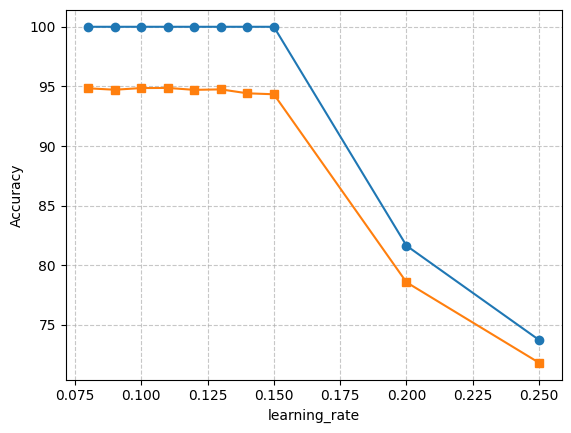

In [30]:
# Train your neural network model on the small data using each learning rate
learning_rates = [0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.2, 0.25]
label = f'learning_rate'
mlp_classifiers[label] = []
for idx, learning_rate_init in enumerate(tqdm(learning_rates)):
    time_train_mlp(label, learning_rate_init, functools.partial(
        train_mlp, label=label, learning_rate_init=learning_rate_init
    ))
plot_error(label, mlp_classifiers[label], learning_rates)

#### Tuning L2 Regularization

  0%|          | 0/13 [00:00<?, ?it/s]

alpha 0.0001 | Elapsed: 13.177403874928132
alpha 0.001 | Elapsed: 11.87685945793055
alpha 0.005 | Elapsed: 11.465185082983226
alpha 0.01 | Elapsed: 11.232103000045754
alpha 0.05 | Elapsed: 11.437716874992475
alpha 0.1 | Elapsed: 12.769546041963622
alpha 0.2 | Elapsed: 11.866966499947011
alpha 0.3 | Elapsed: 11.5705942499917
alpha 0.4 | Elapsed: 12.379540333990008
alpha 0.5 | Elapsed: 11.53305220801849
alpha 1 | Elapsed: 11.143785875057802
alpha 2 | Elapsed: 12.116801957949065
alpha 3 | Elapsed: 10.8332653749967
Best parameter: 0.1 | Accuracy: 95.63000000000001%


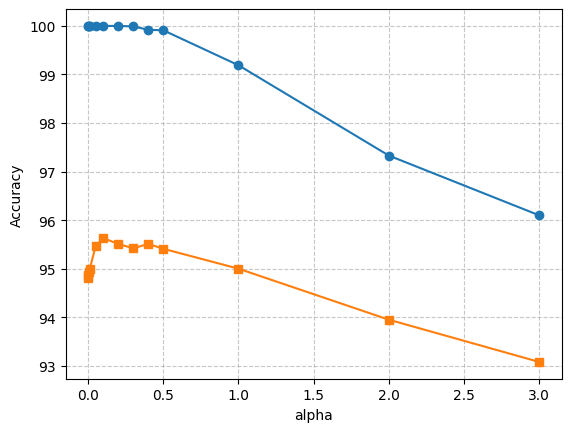

In [31]:
alphas = [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 2, 3]
label = 'alpha'

mlp_classifiers[label] = []
for idx, alpha in enumerate(tqdm(alphas)):
    time_train_mlp(label, alpha, functools.partial(
        train_mlp, label=label, learning_rate_init=0.11, alpha=alpha
    ))
plot_error(label, mlp_classifiers[label], alphas)

#### Tuning Solver 

  0%|          | 0/3 [00:00<?, ?it/s]

solvers sgd | Elapsed: 12.104484541923739
solvers adam | Elapsed: 12.068601957987994
solvers lbfgs | Elapsed: 4.787839125026949
Best parameter: sgd | Accuracy: 95.48%


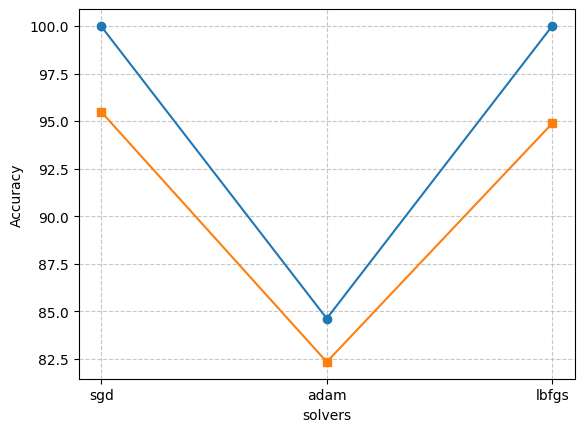

In [32]:
solvers = ['sgd', 'adam', 'lbfgs']
label = 'solvers'
mlp_classifiers[label] = []

for idx, solver in enumerate(tqdm(solvers)):
    time_train_mlp(label, solver, functools.partial(
        train_mlp, label=label, learning_rate_init=0.1, alpha=0.3, solver=solver
    ))
plot_error(label, mlp_classifiers[label], solvers)

#### Tuning Activation Function

  0%|          | 0/4 [00:00<?, ?it/s]

activations relu | Elapsed: 12.847982791019604
activations logistic | Elapsed: 12.958354625036009
activations tanh | Elapsed: 12.380593040958047
activations identity | Elapsed: 11.778132749954239
Best parameter: relu | Accuracy: 95.56%


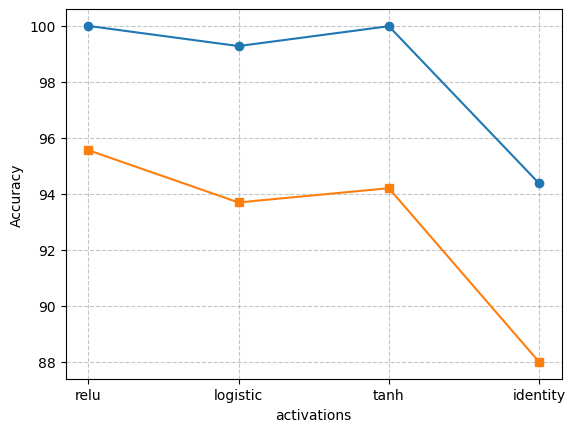

In [33]:
activations = ['relu', 'logistic', 'tanh', 'identity']
label = 'activations'
mlp_classifiers[label] = []

for idx, activation in enumerate(tqdm(activations)):
    time_train_mlp(label, activation, functools.partial(
        train_mlp, label=label, learning_rate_init=0.1, alpha=0.2, solver='sgd',
        activation=activation
    ))
plot_error(label, mlp_classifiers[label], activations)

#### Tuning Learning Rate Type

  0%|          | 0/3 [00:00<?, ?it/s]

learning_rates constant | Elapsed: 13.659969208063558
learning_rates invscaling | Elapsed: 12.467997041996568
learning_rates adaptive | Elapsed: 12.529573249979876
Best parameter: constant | Accuracy: 95.56%


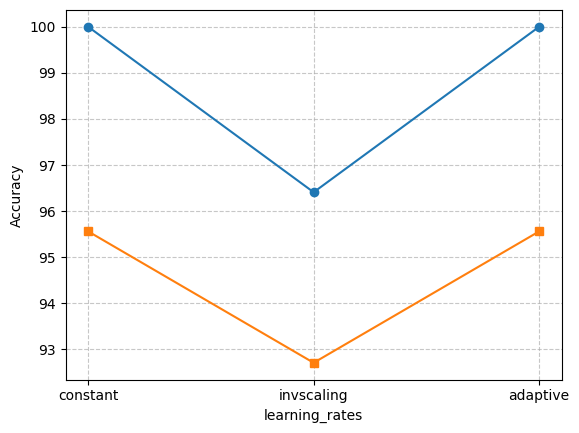

In [34]:
learning_rates = ['constant', 'invscaling', 'adaptive']
label = 'learning_rates'
mlp_classifiers[label] = []

for idx, learning_rate in enumerate(tqdm(learning_rates)):
    time_train_mlp(label, learning_rate, functools.partial(
        train_mlp, label=label, learning_rate_init=0.1, alpha=0.2, solver='sgd',
        activation='relu', learning_rate=learning_rate
    ))
plot_error(label, mlp_classifiers[label], learning_rates)

#### Tuning n_iter_no_changes

  0%|          | 0/7 [00:00<?, ?it/s]

n_iter_no_changes 1 | Elapsed: 5.0695946250343695
n_iter_no_changes 5 | Elapsed: 7.63987058296334
n_iter_no_changes 10 | Elapsed: 7.968691708985716
n_iter_no_changes 50 | Elapsed: 12.699487125035375
n_iter_no_changes 100 | Elapsed: 12.967359957983717
n_iter_no_changes 200 | Elapsed: 12.401292666909285
n_iter_no_changes 300 | Elapsed: 12.969256916083395
Best parameter: 10 | Accuracy: 95.62%


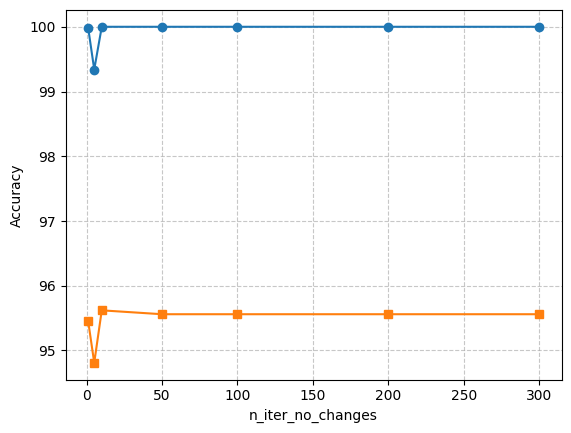

In [35]:
n_iter_no_changes = [1, 5, 10, 50, 100, 200, 300]
label = 'n_iter_no_changes'
mlp_classifiers[label] = []

for idx, n_iter_no_change in enumerate(tqdm(n_iter_no_changes)):
    time_train_mlp(label, n_iter_no_change, functools.partial(
        train_mlp, label=label, learning_rate_init=0.1, alpha=0.2, solver='sgd',
        activation='relu', learning_rate='constant', 
        n_iter_no_change=n_iter_no_change
    ))
plot_error(label, mlp_classifiers[label], n_iter_no_changes)

Note: Though the `n_iter_no_changes` of `10` has the highest accuracy, this value underperforms when other hyperparameters are configured as it cut-offs the training if no improvement occurs within `10` iterations. Hence, `100` is chosen as the `n_iter_no_changes` as it is the default and has the same error as `50` which is the next highest hyperparameter value.

#### Tuning Batch Size

  0%|          | 0/5 [00:00<?, ?it/s]

batch_sizes 64 | Elapsed: 3.12901687505655
batch_sizes 128 | Elapsed: 7.324034124962054
batch_sizes 256 | Elapsed: 8.454091834020801
batch_sizes 512 | Elapsed: 10.970130458008498
batch_sizes 1024 | Elapsed: 6.576037083985284
Best parameter: 256 | Accuracy: 95.62%


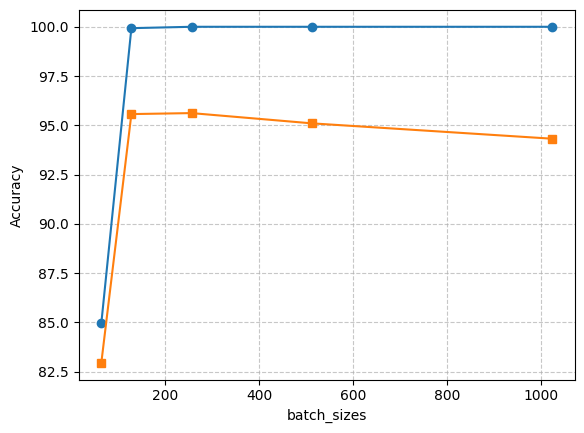

In [36]:
batch_sizes = [64, 128, 256, 512, 1024]
label = 'batch_sizes'
mlp_classifiers[label] = []

for idx, batch_size in enumerate(tqdm(batch_sizes)):
    time_train_mlp(label, batch_size, functools.partial(
        train_mlp, label=label, learning_rate_init=0.1, alpha=0.2, solver='sgd',
        activation='relu', learning_rate='constant', 
        n_iter_no_change=10, batch_size=batch_size
    ))
plot_error(label, mlp_classifiers[label], batch_sizes)

#### Tuning Hidden Layers

  0%|          | 0/13 [00:00<?, ?it/s]

hidden_layer_size (64,) | Elapsed: 13.00134600000456
hidden_layer_size 128 | Elapsed: 22.779314541025087
hidden_layer_size 192 | Elapsed: 29.287168124923483
hidden_layer_size 350 | Elapsed: 53.53746879193932
hidden_layer_size 500 | Elapsed: 74.30811800004449
hidden_layer_size 784 | Elapsed: 97.27678316703532
hidden_layer_size (784, 340) | Elapsed: 158.80192820797674
hidden_layer_size (784, 350) | Elapsed: 159.9211642500013
hidden_layer_size (784, 375) | Elapsed: 167.43855504202656
hidden_layer_size (784, 392) | Elapsed: 151.20651416608598
hidden_layer_size (784, 350, 150) | Elapsed: 184.64145220792852
hidden_layer_size (784, 350, 175) | Elapsed: 174.46575033303816
hidden_layer_size (784, 350, 200) | Elapsed: 167.991904333001
Best parameter: (784, 350) | Accuracy: 96.22%


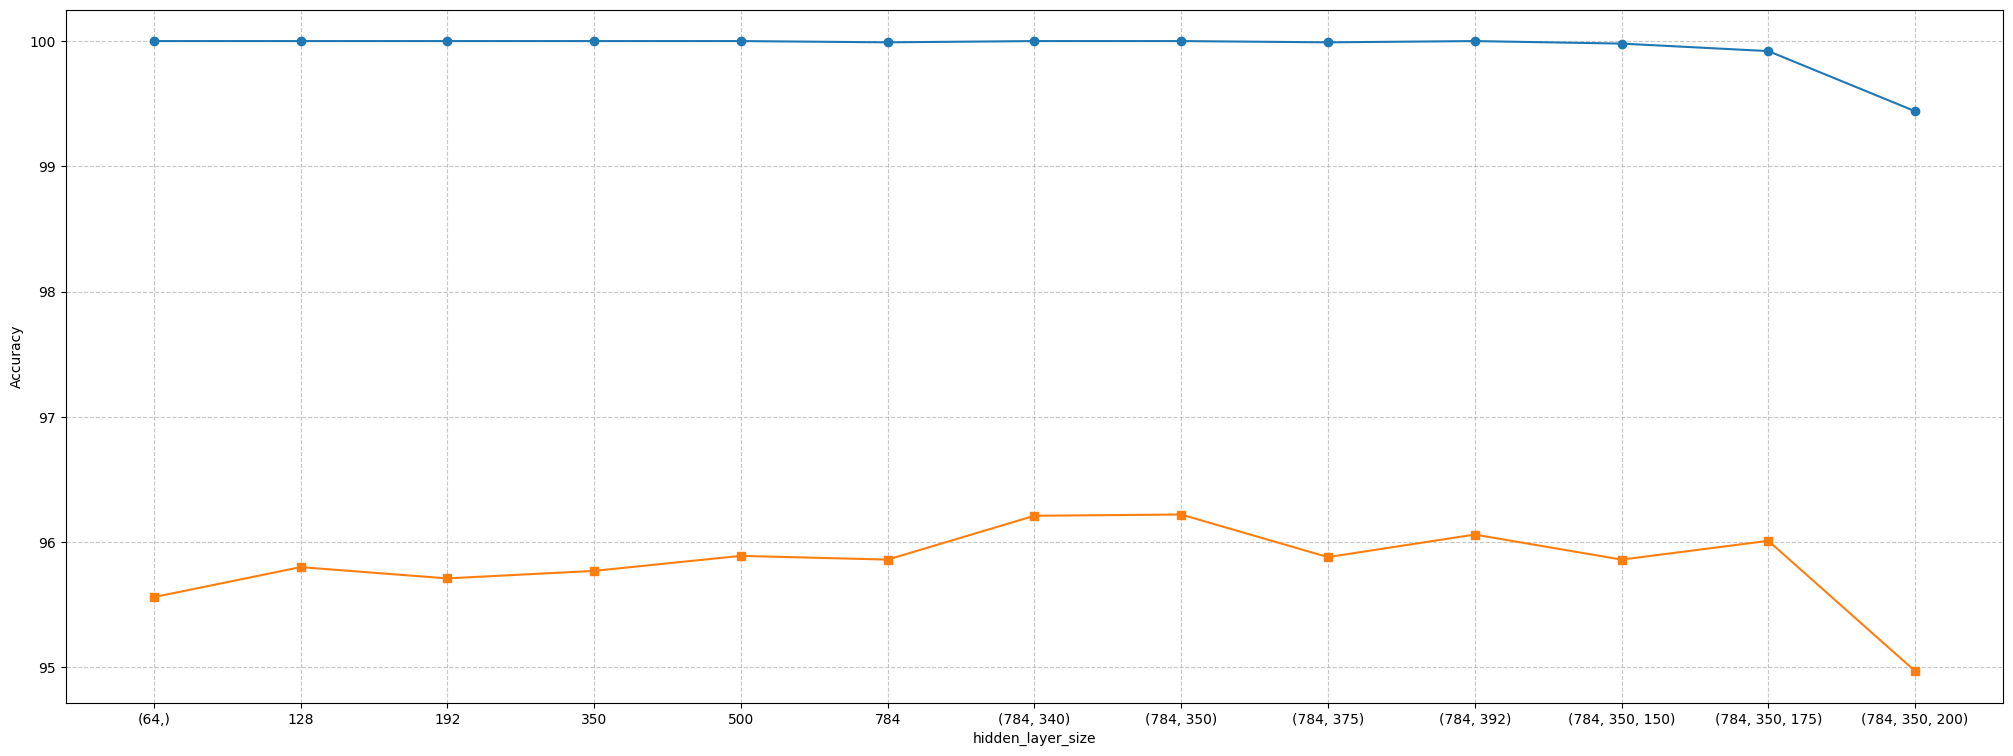

In [37]:
hidden_layer_sizes = [(64,), (128), (192), (350), (500), (784),
                      (784, 340, ), (784, 350, ), (784, 375, ), (784, 392),
                      (784, 350, 150, ), (784, 350, 175, ), (784, 350, 200)]
label = 'hidden_layer_size'
mlp_classifiers[label] = []

for idx, layer_size in enumerate(tqdm(hidden_layer_sizes)):
    time_train_mlp(label, layer_size, functools.partial(
        train_mlp, label=label, learning_rate_init=0.1, alpha=0.2, solver='sgd',
        activation='relu', learning_rate='constant', n_iter_no_change=100, 
        batch_size=256, hidden_layer_size=layer_size
    ))
fig = plt.figure(figsize=(25, 9))
plot_error(label, mlp_classifiers[label], list(map(str, hidden_layer_sizes)))

#### Tuning Max Iterations

  0%|          | 0/5 [00:00<?, ?it/s]

max_iter 100 | Elapsed: 131.4502664169995
max_iter 150 | Elapsed: 224.8105485830456
max_iter 200 | Elapsed: 309.74868116597645
max_iter 250 | Elapsed: 381.53111729200464
max_iter 300 | Elapsed: 401.90054062509444
Best parameter: 250 | Accuracy: 96.28%


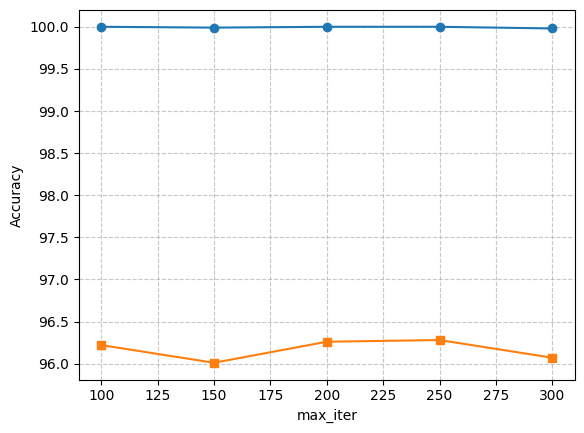

In [38]:
max_iters = [100, 150, 200, 250, 300]
label = 'max_iter'
mlp_classifiers[label] = []

for idx, max_iter in enumerate(tqdm(max_iters)):
    time_train_mlp(label, max_iter, functools.partial(
        train_mlp, label=label, learning_rate_init=0.1, alpha=0.2, solver='sgd',
        activation='relu', learning_rate='constant', n_iter_no_change=100, 
        batch_size=256, hidden_layer_size=(784, 350), max_iter=max_iter
    ))
plot_error(label, mlp_classifiers[label], max_iters)

#### Aggregating Models

In [ ]:
import pandas as pd

df = pd.DataFrame(columns=['Batch Size', 'Hidden Layer Size', 'Learn Type', 'Learning Rate', 'Max Iter', 'n_iter_no_change', 'Solver', 'Activation', 'Train Score', 'Test Score'])

for label, mlp_classifier_list in mlp_classifiers.items():
    for label_classifier in mlp_classifier_list:
        train_acc, test_acc = compute_accuracy(label_classifier)
        df = pd.concat([pd.DataFrame([[
            label_classifier.batch_size, label_classifier.hidden_layer_sizes, 
            label_classifier.learning_rate, label_classifier.learning_rate_init,
            label_classifier.max_iter, label_classifier.n_iter_no_change, 
            label_classifier.solver, label_classifier.activation,
            train_acc, test_acc
        ]], columns=df.columns), df])

print(df.sort_values('Test Score', ascending=False).to_markdown(index=False))

|   Batch Size | Hidden Layer Size   | Learn Type   |   Learning Rate |   Max Iter |   n_iter_no_change | Solver   | Activation   |   Train Score |   Test Score |
|-------------:|:--------------------|:-------------|----------------:|-----------:|-------------------:|:---------|:-------------|--------------:|-------------:|
|          256 | (784, 350)          | constant     |            0.1  |        250 |                100 | sgd      | relu         |        1      |       0.9628 |
|          256 | (784, 350)          | constant     |            0.1  |        200 |                100 | sgd      | relu         |        1      |       0.9626 |
|          256 | (784, 350)          | constant     |            0.1  |        100 |                100 | sgd      | relu         |        1      |       0.9622 |
|          256 | (784, 350)          | constant     |            0.1  |        100 |                100 | sgd      | relu         |        1      |       0.9622 |
|          256 | (784, 340)          | constant     |            0.1  |        100 |                100 | sgd      | relu         |        1      |       0.9621 |
|          256 | (784, 350)          | constant     |            0.1  |        300 |                100 | sgd      | relu         |        0.9998 |       0.9607 |
|          256 | (784, 392)          | constant     |            0.1  |        100 |                100 | sgd      | relu         |        1      |       0.9606 |
|          256 | (784, 350)          | constant     |            0.1  |        150 |                100 | sgd      | relu         |        0.9999 |       0.9601 |
|          256 | (784, 350, 175)     | constant     |            0.1  |        100 |                100 | sgd      | relu         |        0.9992 |       0.9601 |
|          256 | 500                 | constant     |            0.1  |        100 |                100 | sgd      | relu         |        1      |       0.9589 |
|          256 | (784, 375)          | constant     |            0.1  |        100 |                100 | sgd      | relu         |        0.9999 |       0.9588 |
|          256 | 784                 | constant     |            0.1  |        100 |                100 | sgd      | relu         |        0.9999 |       0.9586 |
|          256 | (784, 350, 150)     | constant     |            0.1  |        100 |                100 | sgd      | relu         |        0.9998 |       0.9586 |
|          256 | 128                 | constant     |            0.1  |        100 |                100 | sgd      | relu         |        1      |       0.958  |
|          256 | 350                 | constant     |            0.1  |        100 |                100 | sgd      | relu         |        1      |       0.9577 |
|          256 | 192                 | constant     |            0.1  |        100 |                100 | sgd      | relu         |        1      |       0.9571 |
|          256 | (64,)               | constant     |            0.11 |        100 |                100 | sgd      | relu         |        1      |       0.9563 |
|          256 | (64,)               | constant     |            0.1  |        100 |                 10 | sgd      | relu         |        1      |       0.9562 |
|          256 | (64,)               | constant     |            0.1  |        100 |                 10 | sgd      | relu         |        1      |       0.9562 |
|          128 | (64,)               | constant     |            0.1  |        100 |                 10 | sgd      | relu         |        0.9993 |       0.9557 |
|          256 | (64,)               | constant     |            0.1  |        100 |                100 | sgd      | relu         |        1      |       0.9556 |
|          256 | (64,)               | constant     |            0.1  |        100 |                100 | sgd      | relu         |        1      |       0.9556 |
|          256 | (64,)               | adaptive     |            0.1  |        100 |                100 | sgd      | relu         |        1      |       0.9556 |
|          256 | (64,)               | constant     |            0.1  |        100 |                 50 | sgd      | relu         |        1      |       0.9556 |
|          256 | (64,)               | constant     |            0.1  |        100 |                100 | sgd      | relu         |        1      |       0.9556 |
|          256 | (64,)               | constant     |            0.1  |        100 |                200 | sgd      | relu         |        1      |       0.9556 |
|          256 | (64,)               | constant     |            0.1  |        100 |                300 | sgd      | relu         |        1      |       0.9556 |
|          256 | (64,)               | constant     |            0.1  |        100 |                100 | sgd      | relu         |        1      |       0.9556 |
|          256 | (64,)               | constant     |            0.11 |        100 |                100 | sgd      | relu         |        0.9992 |       0.9551 |
|          256 | (64,)               | constant     |            0.11 |        100 |                100 | sgd      | relu         |        1      |       0.9551 |
|          256 | (64,)               | constant     |            0.1  |        100 |                100 | sgd      | relu         |        0.9997 |       0.9548 |
|          256 | (64,)               | constant     |            0.11 |        100 |                100 | sgd      | relu         |        1      |       0.9547 |
|          256 | (64,)               | constant     |            0.1  |        100 |                  1 | sgd      | relu         |        0.9998 |       0.9545 |
|          256 | (64,)               | constant     |            0.11 |        100 |                100 | sgd      | relu         |        0.9999 |       0.9542 |
|          256 | (64,)               | constant     |            0.11 |        100 |                100 | sgd      | relu         |        0.9991 |       0.9541 |
|          512 | (64,)               | constant     |            0.1  |        100 |                 10 | sgd      | relu         |        1      |       0.951  |
|          256 | (64,)               | constant     |            0.11 |        100 |                100 | sgd      | relu         |        0.9919 |       0.95   |
|          256 | (64,)               | constant     |            0.11 |        100 |                100 | sgd      | relu         |        1      |       0.9499 |
|          256 | (784, 350, 200)     | constant     |            0.1  |        100 |                100 | sgd      | relu         |        0.9944 |       0.9497 |
|          256 | (64,)               | constant     |            0.11 |        100 |                100 | sgd      | relu         |        1      |       0.9494 |
|          256 | (64,)               | constant     |            0.1  |        100 |                100 | lbfgs    | relu         |        1      |       0.9488 |
|          256 | (64,)               | constant     |            0.11 |        100 |                100 | sgd      | relu         |        1      |       0.9487 |
|          256 | (64,)               | constant     |            0.11 |        100 |                100 | sgd      | relu         |        1      |       0.9487 |
|          256 | (64,)               | constant     |            0.1  |        100 |                100 | sgd      | relu         |        1      |       0.9486 |
|          256 | (64,)               | constant     |            0.08 |        100 |                100 | sgd      | relu         |        1      |       0.9484 |
|          256 | (64,)               | constant     |            0.1  |        100 |                  5 | sgd      | relu         |        0.9934 |       0.9481 |
|          256 | (64,)               | constant     |            0.11 |        100 |                100 | sgd      | relu         |        1      |       0.948  |
|          256 | (64,)               | constant     |            0.13 |        100 |                100 | sgd      | relu         |        1      |       0.9475 |
|          256 | (64,)               | constant     |            0.09 |        100 |                100 | sgd      | relu         |        1      |       0.9472 |
|          256 | (64,)               | constant     |            0.12 |        100 |                100 | sgd      | relu         |        1      |       0.9471 |
|          256 | (64,)               | constant     |            0.14 |        100 |                100 | sgd      | relu         |        1      |       0.9442 |
|          256 | (64,)               | constant     |            0.15 |        100 |                100 | sgd      | relu         |        1      |       0.9434 |
|         1024 | (64,)               | constant     |            0.1  |        100 |                 10 | sgd      | relu         |        1      |       0.9432 |
|          256 | (64,)               | constant     |            0.1  |        100 |                100 | sgd      | tanh         |        0.9999 |       0.942  |
|          256 | (64,)               | constant     |            0.11 |        100 |                100 | sgd      | relu         |        0.9733 |       0.9395 |
|          256 | (64,)               | constant     |            0.1  |        100 |                100 | sgd      | logistic     |        0.9928 |       0.9369 |
|          256 | (64,)               | constant     |            0.11 |        100 |                100 | sgd      | relu         |        0.961  |       0.9308 |
|          256 | (64,)               | invscaling   |            0.1  |        100 |                100 | sgd      | relu         |        0.9641 |       0.9271 |
|          256 | (64,)               | constant     |            0.1  |        100 |                100 | sgd      | identity     |        0.9437 |       0.8799 |
|           64 | (64,)               | constant     |            0.1  |        100 |                 10 | sgd      | relu         |        0.8496 |       0.8295 |
|          256 | (64,)               | constant     |            0.1  |        100 |                100 | adam     | relu         |        0.8463 |       0.8235 |
|          256 | (64,)               | constant     |            0.2  |        100 |                100 | sgd      | relu         |        0.8164 |       0.7857 |
|          256 | (64,)               | constant     |            0.25 |        100 |                100 | sgd      | relu         |        0.7373 |       0.7182 |


---
### Statement of Collaboration (5 points)

It is **mandatory** to include a Statement of Collaboration in each submission, with respect to the guidelines below. Include the names of everyone involved in the discussions (especially in-person ones), and what was discussed.

All students are required to follow the academic honesty guidelines posted on the course website. For
programming assignments, in particular, I encourage the students to organize (perhaps using EdD) to
discuss the task descriptions, requirements, bugs in my code, and the relevant technical content before they start
working on it. However, you should not discuss the specific solutions, and, as a guiding principle, you are not
allowed to take anything written or drawn away from these discussions (i.e. no photographs of the blackboard,
written notes, referring to EdD, etc.). Especially after you have started working on the assignment, try
to restrict the discussion to EdD as much as possible, so that there is no doubt as to the extent of your
collaboration.

I did not discuss the specific solutions with anyone.

Maganth Seetharaman 

11/14/23